In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8'
table = pd.read_html(url, match="Коефіцієнт народжуваності в регіонах України *")

In [6]:
df = pd.DataFrame(table[0])

In [7]:
df.head()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
0,Крим,230.0,206.0,160.0,130,73,126,—,—
1,Вінницька,224.0,192.0,142.0,124,84,112,109,76
2,Волинська,247.0,250.0,179.0,153,112,148,141,101
3,Дніпропетровська,204.0,204.0,151.0,123,71,112,111,71
4,Донецька,271.0,214.0,140.0,109,61,98,82,—


In [8]:
r, c = df.shape

print(f"Q-ty rows: {r}\nQ-ty cols: {c}")


Q-ty rows: 28
Q-ty cols: 9


In [9]:
df.replace("—", np.nan, inplace=True)
print(df)

               Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0                Крим  230.0  206.0  160.0   130    73   126  NaN  NaN
1           Вінницька  224.0  192.0  142.0   124    84   112  109   76
2           Волинська  247.0  250.0  179.0   153   112   148  141  101
3    Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4            Донецька  271.0  214.0  140.0   109    61    98   82  NaN
5         Житомирська  261.0  223.0  159.0   129    89   122  120   79
6        Закарпатська  314.0  273.0  207.0   168   115   151  146  104
7          Запорізька  219.0  197.0  150.0   124    71   106  106   68
8   Івано-Франківська  243.0  248.0  182.0   155   103   124  122   88
9            Київська  204.0  189.0  156.0   123    73   122  121   80
10     Кіровоградська  216.0  171.0  145.0   126    79   110  108   68
11          Луганська  262.0  235.0  144.0   116    62    96   51  NaN
12          Львівська  234.0  240.0  171.0   140    91   119  119   87
13    

In [10]:
df.dtypes

Регіон     object
1950      float64
1960      float64
1970      float64
1990        int64
2000        int64
2012        int64
2014       object
2019       object
dtype: object

In [11]:
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce').astype(float)
print(df)
df.dtypes

               Регіон   1950   1960   1970   1990   2000   2012   2014   2019
0                Крим  230.0  206.0  160.0  130.0   73.0  126.0    NaN    NaN
1           Вінницька  224.0  192.0  142.0  124.0   84.0  112.0  109.0   76.0
2           Волинська  247.0  250.0  179.0  153.0  112.0  148.0  141.0  101.0
3    Дніпропетровська  204.0  204.0  151.0  123.0   71.0  112.0  111.0   71.0
4            Донецька  271.0  214.0  140.0  109.0   61.0   98.0   82.0    NaN
5         Житомирська  261.0  223.0  159.0  129.0   89.0  122.0  120.0   79.0
6        Закарпатська  314.0  273.0  207.0  168.0  115.0  151.0  146.0  104.0
7          Запорізька  219.0  197.0  150.0  124.0   71.0  106.0  106.0   68.0
8   Івано-Франківська  243.0  248.0  182.0  155.0  103.0  124.0  122.0   88.0
9            Київська  204.0  189.0  156.0  123.0   73.0  122.0  121.0   80.0
10     Кіровоградська  216.0  171.0  145.0  126.0   79.0  110.0  108.0   68.0
11          Луганська  262.0  235.0  144.0  116.0   62.0   96.0 

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object

In [12]:
(df.isnull().sum() / len(df)) * 100

Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64

In [13]:
df.drop(df.index[-1], inplace=True)
df.tail()

,Регіон,1950,1960,1970,1990,2000,2012,2014,2019
22,Черкаська,205.0,179.0,144.0,123.0,75.0,100.0,98.0,64.0
23,Чернівецька,247.0,218.0,170.0,148.0,101.0,128.0,129.0,92.0
24,Чернігівська,220.0,183.0,127.0,108.0,69.0,94.0,90.0,61.0
25,Київ,NaN,174.0,159.0,120.0,73.0,120.0,121.0,110.0
26,Севастополь,NaN,NaN,NaN,125.0,70.0,120.0,NaN,NaN


In [14]:
numeric_columns = df.columns[1:]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
print(df)

               Регіон    1950        1960   1970   1990   2000   2012    2014  \
0                Крим  230.00  206.000000  160.0  130.0   73.0  126.0  111.44   
1           Вінницька  224.00  192.000000  142.0  124.0   84.0  112.0  109.00   
2           Волинська  247.00  250.000000  179.0  153.0  112.0  148.0  141.00   
3    Дніпропетровська  204.00  204.000000  151.0  123.0   71.0  112.0  111.00   
4            Донецька  271.00  214.000000  140.0  109.0   61.0   98.0   82.00   
5         Житомирська  261.00  223.000000  159.0  129.0   89.0  122.0  120.00   
6        Закарпатська  314.00  273.000000  207.0  168.0  115.0  151.0  146.00   
7          Запорізька  219.00  197.000000  150.0  124.0   71.0  106.0  106.00   
8   Івано-Франківська  243.00  248.000000  182.0  155.0  103.0  124.0  122.00   
9            Київська  204.00  189.000000  156.0  123.0   73.0  122.0  121.00   
10     Кіровоградська  216.00  171.000000  145.0  126.0   79.0  110.0  108.00   
11          Луганська  262.0

In [15]:
cond = df["2019"] > df.mean(numeric_only=True)["2019"]
df[cond]["Регіон"].tolist()

['Волинська',
 'Закарпатська',
 'Івано-Франківська',
 'Львівська',
 'Одеська',
 'Рівненська',
 'Херсонська',
 'Чернівецька',
 'Київ']

In [16]:
df.loc[df["2014"].idxmax(), "Регіон"]

'Рівненська'

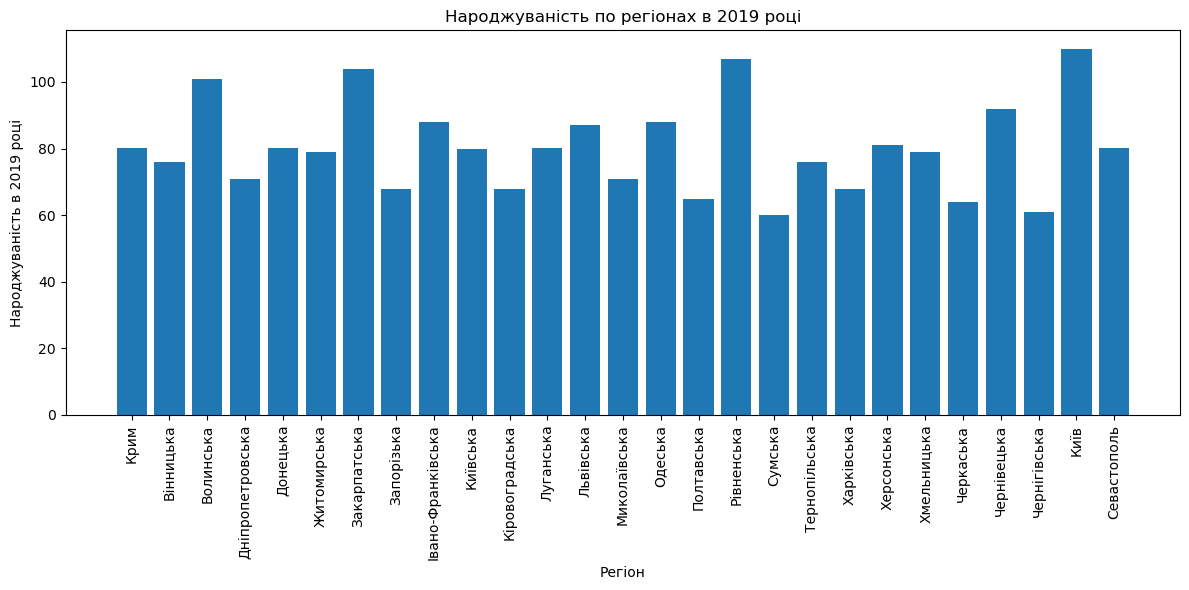

In [17]:
plt.figure(figsize=(12, 6))
plt.bar(df['Регіон'], df['2019'])
plt.xticks(rotation=90)
plt.xlabel('Регіон')
plt.ylabel('Народжуваність в 2019 році')
plt.title('Народжуваність по регіонах в 2019 році')
plt.tight_layout()

plt.show()